**Name: Seán Kendall**

**Student Number: 20355246**

# Machine Learning Assignment 2

#### Question 1 

In [261]:
# import packages
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

(a) Clean and prepare the dataset for machine learning analysis. You can do basic feature engineering to make your techniques scalable, but there is no need to go overboard with the dataset cleaning. Carefully consider the evaluation measure(s) that you use for this exercise and justify why you selected the particular evaluation measure(s).

In [262]:
df = pd.read_csv("census_20355246.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,29,Local-gov,180916,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K
1,38,Private,159179,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
2,46,Private,128460,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
3,17,Private,222618,11th,7,Never-married,Sales,Own-child,Black,Female,0,0,30,United-States,<=50K
4,34,Private,117444,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,65,United-States,>50K


In [263]:
df.shape

(10000, 15)

"?" values in three columns.

In [264]:
value_counts = df[' occupation'].value_counts()
print(value_counts)

 Prof-specialty       1276
 Exec-managerial      1258
 Craft-repair         1244
 Adm-clerical         1170
 Sales                1106
 Other-service        1034
 Machine-op-inspct     594
 ?                     561
 Transport-moving      518
 Handlers-cleaners     402
 Tech-support          295
 Farming-fishing       295
 Protective-serv       199
 Priv-house-serv        45
 Armed-Forces            3
Name:  occupation, dtype: int64


In [265]:
value_counts = df[' native-country'].value_counts()
print(value_counts)


 United-States            9019
 Mexico                    189
 ?                         161
 Philippines                50
 Germany                    46
 India                      40
 Canada                     39
 Puerto-Rico                30
 England                    26
 El-Salvador                26
 Cuba                       25
 Guatemala                  23
 Jamaica                    21
 Italy                      21
 China                      20
 Japan                      20
 Poland                     20
 Taiwan                     19
 Iran                       18
 South                      18
 Columbia                   17
 Vietnam                    16
 Dominican-Republic         15
 Ecuador                    12
 Haiti                      11
 Greece                     10
 France                     10
 Portugal                    9
 Peru                        9
 Ireland                     8
 Nicaragua                   8
 Cambodia                    7
 Hong   

In [266]:
value_counts = df[' workclass'].value_counts()
print(value_counts)


 Private             6974
 Self-emp-not-inc     788
 Local-gov            610
 ?                    557
 State-gov            411
 Self-emp-inc         348
 Federal-gov          303
 Without-pay            5
 Never-worked           4
Name:  workclass, dtype: int64


There are 10000 rows in this dataset. The columns include 14 features and one target column, "Income-category". 

In [267]:
df.dtypes

age                  int64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country     object
 Income-category    object
dtype: object

There are 6 numerical columns "int" and the rest are of type "object". All are appropriate.

In [268]:
column_names = df.columns
print(column_names)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' Income-category'],
      dtype='object')


Column names need to stripped of leading space.

In [269]:
df.nunique()

age                   71
 workclass             9
 fnlwgt             8541
 education            16
 education-num        16
 marital-status        7
 occupation           15
 relationship          6
 race                  5
 sex                   2
 capital-gain        100
 capital-loss         71
 hours-per-week       81
 native-country       41
 Income-category       2
dtype: int64

In [270]:
df[" Income-category"].unique()

array([' <=50K', ' >50K'], dtype=object)

The two target values in the dataset are " <=50k" and " >50k". Could be converted to 0 and 1 using LabelEncoder.

In [271]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,38.5154,13.688488,17.0,28.0,37.0,47.0,90.0
fnlwgt,10000.0,190348.9101,106557.798654,12285.0,117615.0,179482.5,237622.5,1268339.0
education-num,10000.0,10.0743,2.569093,1.0,9.0,10.0,12.0,16.0
capital-gain,10000.0,1006.9754,7083.766639,0.0,0.0,0.0,0.0,99999.0
capital-loss,10000.0,82.6338,393.864315,0.0,0.0,0.0,0.0,4356.0
hours-per-week,10000.0,40.3614,12.110568,1.0,40.0,40.0,45.0,99.0


Above gives a nice overview of the numerical values in the dataset. The mean and std for these values is very broad in terms of range.

In [272]:
df.isna().sum()

age                 0
 workclass          0
 fnlwgt             0
 education          0
 education-num      0
 marital-status     0
 occupation         0
 relationship       0
 race               0
 sex                0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 native-country     0
 Income-category    0
dtype: int64

There are no missing values in the dataset.

Are there duplicate records?

In [273]:
duplicate_records = df[df.duplicated()]
duplicate_records

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category


No duplicate records.

Inspecting categorical features:

In [274]:
categorical_features = selector(dtype_include=["object"])
categorical_features = categorical_features(df)
data_categorical = df[categorical_features]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income-category
0,Local-gov,Some-college,Separated,Adm-clerical,Unmarried,White,Female,United-States,<=50K
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
2,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,<=50K
3,Private,11th,Never-married,Sales,Own-child,Black,Female,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [275]:
target = data_categorical.pop(" Income-category")
target.head()

0     <=50K
1      >50K
2     <=50K
3     <=50K
4      >50K
Name:  Income-category, dtype: object

In [276]:
target.value_counts()

 <=50K    7600
 >50K     2400
Name:  Income-category, dtype: int64

Above you can see there is not an equal balance of values in the target column. " <=50K" is the dominant class in this dataset and is almost around three times larger than " >50K". This should be taken into consideration when choosing an evaluation measure.  

In [277]:
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Local-gov,Some-college,Separated,Adm-clerical,Unmarried,White,Female,United-States
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
3,Private,11th,Never-married,Sales,Own-child,Black,Female,United-States
4,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


Education can be converted using the OrdinalEncoder. 

What to do with the numerical features...

In [278]:
df[" capital-loss"].unique()

array([   0, 1902, 1573,  419, 2246, 1741, 1408, 1887, 2179, 1485, 1825,
       1876, 2444, 1579, 2415, 1977, 1590, 2392, 1651, 1740, 2258, 1504,
       1726, 1980, 1564, 2205,  625, 2824, 1848, 1602, 2129, 1092, 1721,
       2339, 3683, 2042, 1617, 1974, 2559,  880, 2231, 2377, 1628, 1719,
       1138, 4356, 2051, 1762, 1594, 1669, 1672, 2001, 2002, 1668, 1648,
       2206, 1258, 2603, 1380, 2149, 3900,  323, 2057, 2547, 2754,  213,
       1735, 2467,  974,  653, 2457], dtype=int64)

#### Potential problems and data quality issues are:

(1) Feature names have a space before the first word and there are spaces in column values that are unecessary.

(2) Target column is an object datatype. 

(3) Categorical features need to be converted to numerical. 

(4) Numerical features need to be handled.

(5) "?" values to be dealt with?

#### Solutions:

(1) Strip leading space from column names and remove blank space from values.

(2) Convert target column to 0 and 1 classes. This can be done with LabelEncoder.

(3) Convert categorical features to numerical:
- OneHotEncoder to convert the categorical features to numerical.
- Drop "education" feature, "education-num" is similar and already in numerical form. 

(4) Normalize "age" and "hours-per-week".

(5) Keeping the "?" values for the moment.

#### (1) Removing unnecessary space from feature names and values: 

Feature names:

In [279]:
df.columns = df.columns.str.strip()
data_categorical.columns = data_categorical.columns.str.strip()
column_names = df.columns
print(column_names)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income-category'],
      dtype='object')


Feature names no longer have a leading space.

Below is an example of where there is a blank space before the "workclass" values. This doesn't need to be there and hence I shall remove it.

In [280]:
df["workclass"].unique()

array([' Local-gov', ' Private', ' Self-emp-not-inc', ' Self-emp-inc',
       ' State-gov', ' ?', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

First I need to convert all "object" type features to "string" so that I can remove the spaces.

In [281]:
object_columns = df.select_dtypes(include=["object"]).columns
df[object_columns] = df[object_columns].astype("string")

object_columns = data_categorical.select_dtypes(include=["object"]).columns
data_categorical[object_columns] = data_categorical[object_columns].astype("string")

C:\Users\Sean\AppData\Local\Temp\ipykernel_18564\714066217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categorical[object_columns] = data_categorical[object_columns].astype("string")


In [282]:
df.dtypes

age                 int64
workclass          string
fnlwgt              int64
education          string
education-num       int64
marital-status     string
occupation         string
relationship       string
race               string
sex                string
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     string
Income-category    string
dtype: object

Now all "object" types are replaced with "string".

In [283]:
df = df.applymap(lambda x: x if not isinstance(x, str) else x.replace(' ', ''))
data_categorical = data_categorical.applymap(lambda x: x if not isinstance(x, str) else x.replace(' ', ''))
target = target.map(lambda x: x if not isinstance(x, str) else x.replace(' ', ''))

Above I remove all the spaces.

In [284]:
df["workclass"].unique()

array(['Local-gov', 'Private', 'Self-emp-not-inc', 'Self-emp-inc',
       'State-gov', '?', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

Now we can see our previous example is fixed.

#### (2) Converting target to values to 1 and 0 using LabelEncoder:

In [285]:
target.value_counts()

<=50K    7600
>50K     2400
Name:  Income-category, dtype: int64

In [286]:
label_encoder = LabelEncoder()
# transform method is similar to predict for 
target_encoded = pd.DataFrame(label_encoder.fit_transform(target), columns=[">50K"])
target_encoded.head()

,>50K
0,0
1,1
2,0
3,0
4,1


In [287]:
target_encoded.value_counts()

>50K
0       7600
1       2400
dtype: int64

#### (3) Converting categorical features to numerical:

In [288]:
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Local-gov,Some-college,Separated,Adm-clerical,Unmarried,White,Female,United-States
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,10th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
3,Private,11th,Never-married,Sales,Own-child,Black,Female,United-States
4,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


First dropping the "education" feature:

In [289]:
data_categorical = data_categorical.drop("education", axis=1)

In [290]:
data_categorical.head()

,workclass,marital-status,occupation,relationship,race,sex,native-country
0,Local-gov,Separated,Adm-clerical,Unmarried,White,Female,United-States
1,Private,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
3,Private,Never-married,Sales,Own-child,Black,Female,United-States
4,Private,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


Using OneHotEncoder to convert the rest of the categorical features to numerical:

In [291]:
onehot_encoder = OneHotEncoder(sparse=False)
categories_encoded = onehot_encoder.fit_transform(data_categorical[["workclass", "marital-status", "occupation", 
                                                                      "relationship", "race", "sex", "native-country"]])
categories_encoded[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
      

In [292]:
print(f"The encoded dataset contains {categories_encoded.shape[1]} features")

The encoded dataset contains 85 features


In [293]:
columns_encoded = onehot_encoder.get_feature_names(data_categorical[["workclass", "marital-status", "occupation", 
                                                                      "relationship", "race", "sex", "native-country"]].columns)
categorical_columns = pd.DataFrame(categories_encoded, columns=columns_encoded)
categorical_columns[:5]

c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [294]:
categorical_columns["workclass_Private"]

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    0.0
9997    1.0
9998    1.0
9999    1.0
Name: workclass_Private, Length: 10000, dtype: float64

All the categorical columns are now converted using one-hot encoder. 

#### (4) Handling numerical features

In [295]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,29,Local-gov,180916,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K
1,38,Private,159179,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
2,46,Private,128460,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
3,17,Private,222618,11th,7,Never-married,Sales,Own-child,Black,Female,0,0,30,United-States,<=50K
4,34,Private,117444,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,65,United-States,>50K


In [296]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,38.5154,13.688488,17.0,28.0,37.0,47.0,90.0
fnlwgt,10000.0,190348.9101,106557.798654,12285.0,117615.0,179482.5,237622.5,1268339.0
education-num,10000.0,10.0743,2.569093,1.0,9.0,10.0,12.0,16.0
capital-gain,10000.0,1006.9754,7083.766639,0.0,0.0,0.0,0.0,99999.0
capital-loss,10000.0,82.6338,393.864315,0.0,0.0,0.0,0.0,4356.0
hours-per-week,10000.0,40.3614,12.110568,1.0,40.0,40.0,45.0,99.0


The "age" feature has a wide range of 17-90 while for the categorical features they now will lie between 0-1 range. Therefore, I shall perform min-max normalization on "age". 

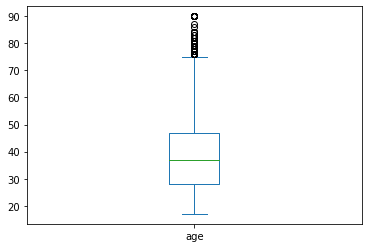

In [297]:
df["age"].plot(kind='box');

In [298]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler(feature_range=(0, 1))
age = pd.DataFrame(scaler.fit_transform(df[["age"]].values), columns=["age"])

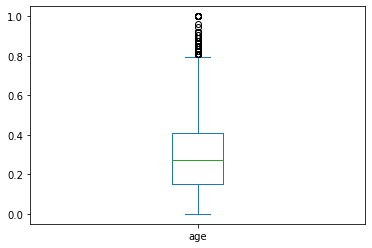

In [299]:
age.plot(kind="box");

You can see above the distribution of the values is the same above, just the range has changed.

I will do the same with the "hours-per-week" feature as it range is similar 1-99. 

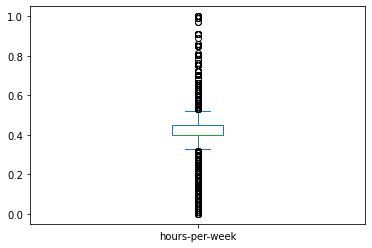

In [300]:
hrs_per_wk = pd.DataFrame(scaler.fit_transform(df[["hours-per-week"]].values), columns=["hours-per-week"])
hrs_per_wk.plot(kind="box");

Concatenating all new columns together and finalizing the dataframe:

In [301]:
df = pd.concat([age, df["education-num"], df["fnlwgt"], categorical_columns, df["capital-gain"], 
                df["capital-loss"], hrs_per_wk, target_encoded], axis=1)
df.head()

,age,education-num,fnlwgt,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,capital-gain,capital-loss,hours-per-week,>50K
0,0.164384,10,180916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.377551,0
1,0.287671,10,159179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1902,0.500000,1
2,0.397260,6,128460,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.397959,0
3,0.000000,7,222618,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.295918,0
4,0.232877,13,117444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.653061,1


Above is the new, clean dataset for machine analysis.

#### Evaluation Measure:

<AxesSubplot:>

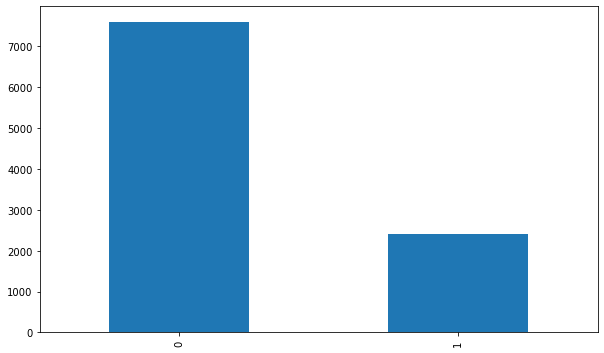

In [302]:
df[">50K"].value_counts().plot(kind="bar", figsize=(10, 6))

It can be seen above that the classes do not have equal represenation.

Accuracy therefore is not suitable for this as it needs a balanced dataset. F1-score is a good option to use when dealing with imbalanced datasets. It balances precision and recall, which can be important when you want a trade-off between false positives and false negatives.

(b) Evaluate the performance of three basic classifiers on your dataset: a decision tree 
with depth at most 3, a neural network with at most 10 hidden nodes and 1-NN.

Dataframe with just the column features:

In [303]:
df_features = pd.concat([age, df["education-num"], df["fnlwgt"], categorical_columns, df["capital-gain"], 
                df["capital-loss"], hrs_per_wk], axis=1)
df_features.head()

,age,education-num,fnlwgt,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,capital-gain,capital-loss,hours-per-week
0,0.164384,10,180916,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.377551
1,0.287671,10,159179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1902,0.500000
2,0.397260,6,128460,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.397959
3,0.000000,7,222618,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.295918
4,0.232877,13,117444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.653061


#### Train-test split:

In [304]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target_encoded, train_size=.75, random_state=5)

#### Decision Tree Classifier (max depth = 3):

In [305]:
dt_clf = DecisionTreeClassifier(max_depth=3) 
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 0.6094333220223956
Test set F1 score = 0.6112702960840497


Parameters:
- criterion="entropy"

In [306]:
dt_clf = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 0.6094333220223956
Test set F1 score = 0.6112702960840497


Parameters:
- criterion="gini"

In [307]:
dt_clf = DecisionTreeClassifier(max_depth=3, criterion="gini")
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 0.6094333220223956
Test set F1 score = 0.6112702960840497


There is no difference adding the parameter "entropy" or "gini" to the classifier.

#### Neural network with at most 10 hidden nodes:

In [308]:
mlp = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=10, random_state=5)
mlp.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = mlp.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = mlp.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set F1 score = 0.406563965170797
Test set F1 score = 0.39887640449438205


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [309]:
for n in [8, 9, 10, 11, 12]:

    print("\nMax_iter = ", n)
    mlp = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=n, random_state=5)
    mlp.fit(X_train, y_train)

    # predict on the training dataset 
    y_predicted = mlp.predict(X_train)
    print("Training set F1 score =", f1_score(y_train, y_predicted))

    # predict on the test dataset 
    y_predicted = mlp.predict(X_test)
    print("Test set F1 score =", f1_score(y_test, y_predicted))


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Max_iter =  8


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set F1 score = 0.37426441741859556
Test set F1 score = 0.3620111731843576

Max_iter =  9


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set F1 score = 0.3959160521837777
Test set F1 score = 0.3907125700560448

Max_iter =  10


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set F1 score = 0.406563965170797
Test set F1 score = 0.39887640449438205

Max_iter =  11


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set F1 score = 0.3867069486404834
Test set F1 score = 0.38156484458735257

Max_iter =  12
Training set F1 score = 0.3815278377211912
Test set F1 score = 0.40357598978288634


c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  warnings.warn(


For the "max_iter" the best option is "max_iter=10".

1-NN:

In [311]:
knn_clf = KNeighborsClassifier(n_neighbors=1) 
knn_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = knn_clf.predict(X_train)
print("F1 score on training set prediction =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = knn_clf.predict(X_test)
print("F1 score on test set prediction =", f1_score(y_test, y_predicted))

c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


F1 score on training set prediction = 1.0
F1 score on test set prediction = 0.3873121869782972


(c) Apply ensembles with bagging using the three classifiers from Task (b). 